In [44]:
#importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns

In [3]:
# Reading data as dataframe
data = pd.read_csv('../../data/raw/Citywide_Survey.csv')

In [13]:
#dummy cell 
test_features = ['person_num', 'is_participant', 'num_days_complete', 'num_trips', 'race_native_hawaiian', 'race_white', 'race_other', 'disability_hearing', 'disability_seeing', 'disability_walking', 'disability_mobility', 'disability_dressing', 'disability_concentrating', 'disability_none']
data = data[test_features]

#### Using the elbow method to find the best value for K

In [ ]:
#a list of the sse for each k
sse_result = []
potential_k = list(range(1, 30))
for k in potential_k:
  kmeans_model = KMeans(n_clusters = k)
  kmeans_model.fit(data)
  sse_result.append(kmeans_model.inertia_)

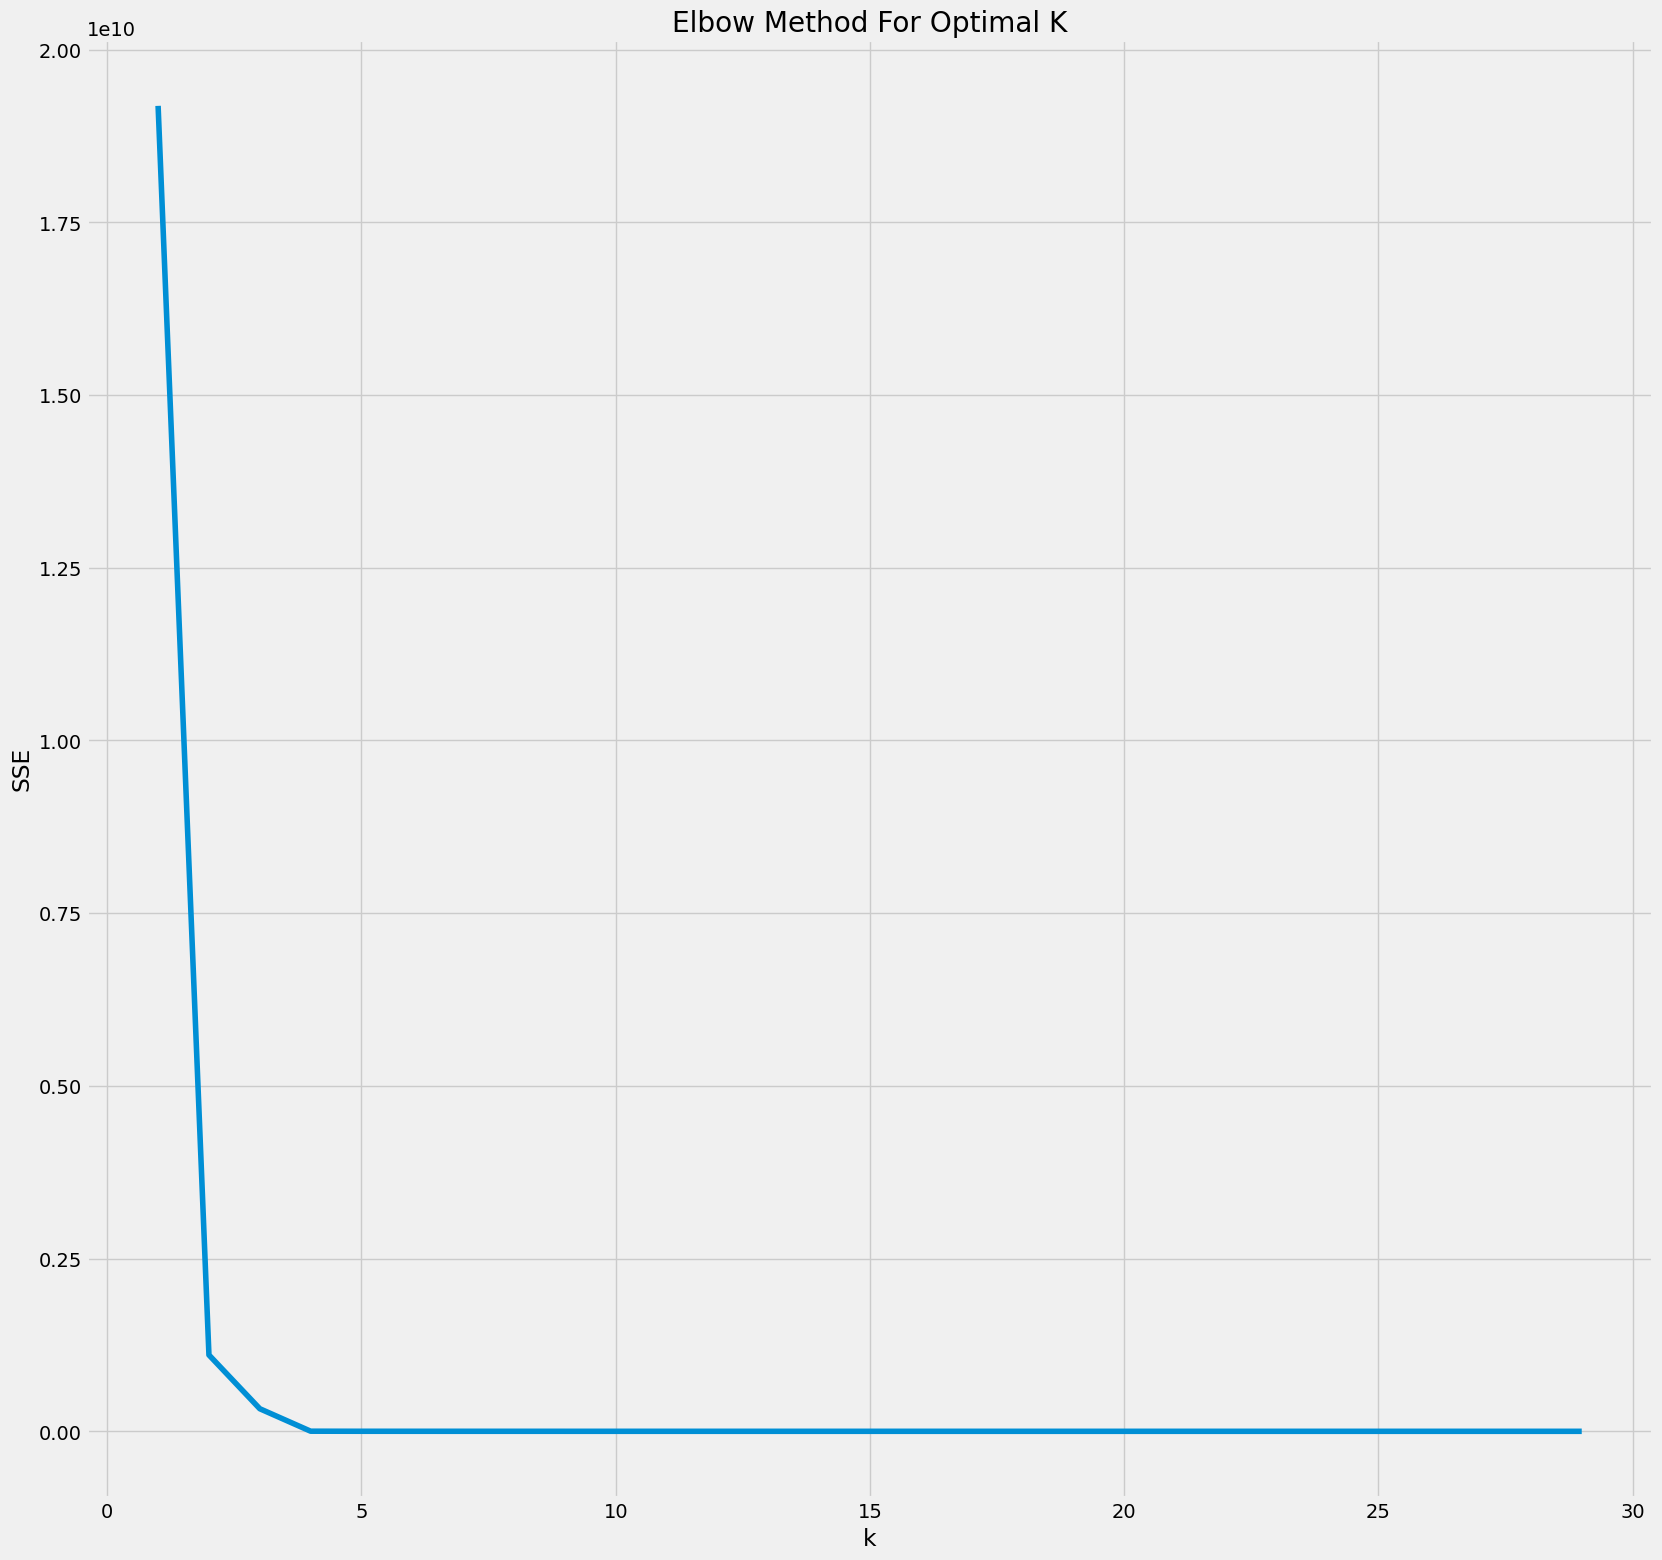

In [70]:
plt.figure(figsize=(18, 18))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.plot(list(range(1, 30)), sse_result)
plt.show()

From the plot above, a value between x - x could be a good value for k 

In [32]:
k_means_model = KMeans(n_clusters = 4, max_iter = 900) 

In [40]:
predicted_labels = k_means_model.fit_predict(data)
predicted_centers = k_means_model.cluster_centers_

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
pca_model = PCA(n_components=2, random_state=42) 
pca_data = pca_model.fit_transform(data)
pca_centers = pca_model.transform(predicted_centers)

In [59]:
components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )
components_df["predicted_cluster"] = predicted_labels

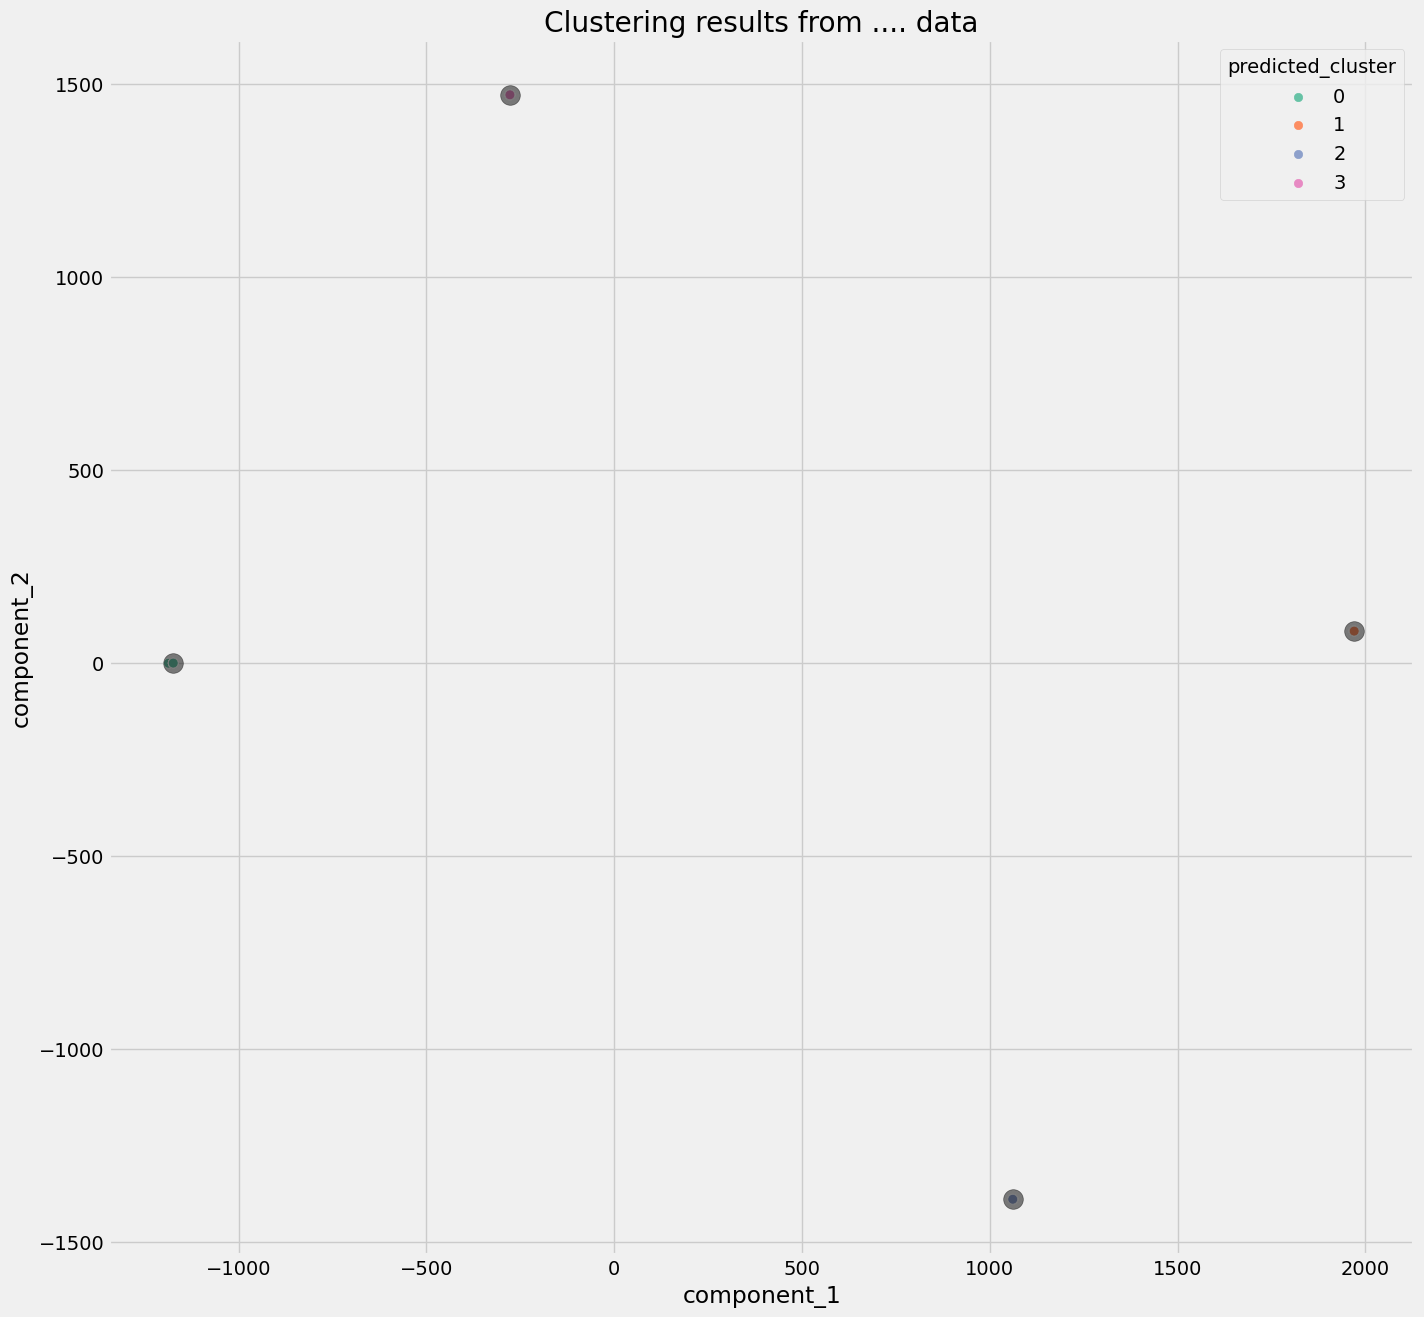

In [64]:
plt.figure(figsize=(15, 15))
plt.style.use("fivethirtyeight")
scat = sns.scatterplot(
   x="component_1",
   y="component_2",
   s=50,
   data=components_df, 
   hue="predicted_cluster",  
   palette="Set2"
)
 
scat.set_title( "Clustering results from .... data") 
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [34]:
pipe = Pipeline(
    [('pca', pca_model),
     ('kmeans', k_means_model)]
                )
pipe.fit(data)
pipe['kmeans'].labels_